## Experimental Results for Baseline Model 

In [7]:
## Import libraries 
import os

import pandas as pd
import numpy as np

from scipy import sparse

from sklearn.metrics import mean_squared_error
from math import sqrt

import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context("paper", font_scale=1.5)

In [55]:
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/data/baseline_model')

## Load Columns 
columns = pd.read_csv('columns.csv').rename(columns={'0':'feature'})

In [14]:
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/models/baseline_model')

## Load Model 
gbm = pickle.load(open('model.sav', 'rb'))

## Visualize Feature Importance

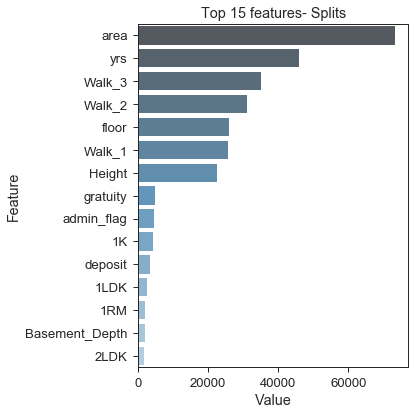

In [71]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(),columns['feature'])), 
                               columns=['Value','Feature'])

plt.figure(figsize=(6, 6))

barplot = sns.barplot(x="Value", y="Feature", palette=("Blues_d"),alpha=0.85, data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:15])

plt.title('Top 15 features- Splits')

plt.tight_layout()

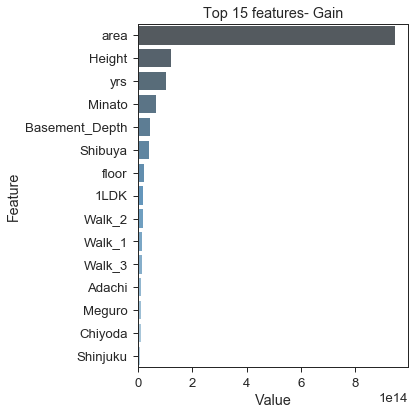

In [70]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(importance_type='gain'),columns['feature'])), 
                               columns=['Value','Feature'])

plt.figure(figsize=(6, 6))

barplot = sns.barplot(x="Value", y="Feature", palette=("Blues_d"),alpha=0.85, data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:15])

plt.title('Top 15 features- Gain')

plt.tight_layout()

In [77]:
## Need to make code that writes a file for this at the end
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/data/postproc')
postproc = pd.read_csv('tokyo_postproc.csv')

,title,location,yrs,floor,rent,deposit,gratuity,floor_plan,area,Ku,...,Car_2,Walk_2,Bus_2,Line_2,Station_2,Car_3,Walk_3,Bus_3,Line_3,Station_3
0,カテリーナ三田タワースイートイーストアーク,港区芝４,13,24,365000,1,1,2LDK,4.21,Minato,...,NaN,4.0,NaN,ＪＲ山手線,田町駅,NaN,NaN,NaN,No_Line_3,No_Station_3
1,ロイヤル水元,葛飾区水元４,26,1,85000,0,1,3DK,4.09,Katsushika,...,NaN,3.0,10.0,京成金町線,京成金町駅,NaN,44.0,NaN,東京メトロ千代田線,北綾瀬駅
2,ヴィラわかくさ,世田谷区等々力８,24,1,63000,1,1,1K,2.99,Setagaya,...,NaN,15.0,NaN,東急大井町線,尾山台駅,NaN,28.0,NaN,東急田園都市線,用賀駅
3,グランビル自由が丘,目黒区緑が丘２,32,2,150000,1,1,1LDK,3.43,Meguro,...,NaN,NaN,NaN,No_Line_2,No_Station_2,NaN,NaN,NaN,No_Line_3,No_Station_3
4,東京メトロ南北線 麻布十番駅 地下1地上10階建 新築,港区麻布十番２,0,6,326000,1,1,2LDK,4.02,Minato,...,NaN,13.0,NaN,都営大江戸線,赤羽橋駅,NaN,16.0,NaN,東京メトロ日比谷線,六本木駅


In [78]:
y_pred_test

NameError: name 'y_pred_test' is not defined

In [ ]:
testframe = pd.DataFrame({'pred':y_pred_test,'actual':y_test})
testframe['residuals'] = testframe.pred - testframe.actual
testframe = pd.merge(testframe, postproc, left_index=True,right_index=True)

testframe.head(10)